In [1]:
library(tidyverse)
library(ggbiplot) 
options(repr.plot.width=5, repr.plot.height=4) # reduce the size of plots to make them look nicer

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: plyr
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compa

# Practical 3: Analyzing the invertebrate community at Kioloa
Due 12pm, Monday 13 May
## Learning objectives
- Calculate and explore emergent properties (richness and diversity) of the Kioloa invertebrate community structure
- Examine how sampling methodology affected the kinds of data collected
- Use ordination to explore the invertebrate community structure of Kioloa
- Compare how these properties are related with plant community composition
- Generate hypotheses about relationships between plant or animal taxa and conduct statistical tests
- Discuss the advantages and limitations of our field methods and analysis for understanding the structure of the Kioloa invertebrate communities.

## Background
Community ecology requires an understanding of both the composition and function of species living in sympatry. Some traditional metrics, such as taxonomic richness, diversity and evenness, can help explore broad patterns in community structure across space and/or time. However, communities often consist of a large number of species that can vary in occurrence and abundance across areas or gradients of interest. While it is possible to plot and explore every single one of these species in turn, this would be extremely time-consuming, and has the added problem of not considering the communities holistically.

Multivariate ordination provides a way to explore patterns in both community composition and relative abundance in a diverse dataset (i.e., with 3 or more species). Such ordinations are not a statistical test, but a way of simplifying a multivariate dataset to visually explore community structure, and generate hypotheses for why such structure exists. We will use one type of ordination – Principal Components Analysis (PCA) – to examine similarities and differences in the structure of the Kioloa biological communities.

We understand that communities are shaped by interactions between organisms and their environment. E.g., birds eat insects, and you need high levels of insects to have lots of birds. Each of you will use your biological knowledge to formulate a prediction, visualize data testing this prediction, and run a regression model to statistically test the hypothesis.

## Estimates of biodiversity

In the prac itself, we'll aggregate taxa at the level of order. I am going to discuss *species* abundance, richess and diversity, but the same math applies at the higher taxonomic levels, too.

### Estimates of biodiversity

In the prac itself, we'll aggregate taxa at the level of order. I am going to discuss *species* abundance, richess and diversity, but the same math applies at the higher taxonomic levels, too.

### Species richness
Species richness is a measure of the number of species found in a sample. Since the larger the sample, the more species we would expect to find, we need to correct for sampling depth. One simple way to do that is simply dividing the number of species by the square root of the number of individuals in the sample. This particular measure of species richness is known as D, the Menhinick's index: $ D = \frac{s}{\sqrt(N)} $, where *s* equals the number of different species represented in your sample, and *N* equals the total number of individual organisms in your sample.

In [2]:
# compute Menhinick's index from a vector of taxon counts
D <- function(n) { 
    length(n > 0)/sqrt(sum(n))
}

### Species diversity
What if our species are not equally abundant? Let's imagine we have two communities that have the same number of species:

In [3]:
(toyCommunity <- data.frame(Species = letters[1:6], site1 = c(59, 12, 11, 10, 5, 3), site2= c(21, 20, 19, 14, 13, 13)))
D(toyCommunity$site1)
D(toyCommunity$site2)

Species,site1,site2
a,59,21
b,12,20
c,11,19
d,10,14
e,5,13
f,3,13


[1] 0.6

[1] 0.6

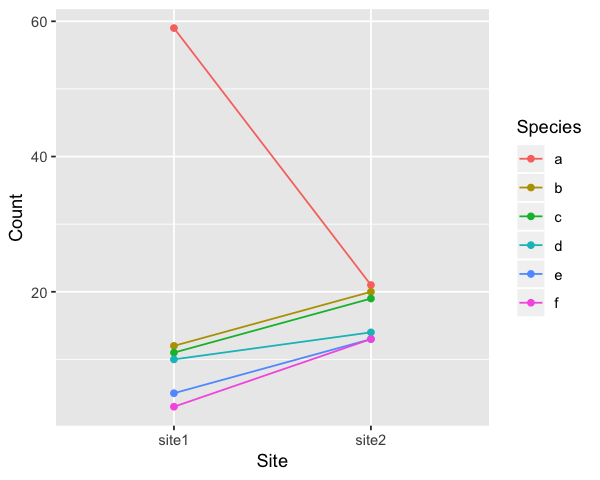

In [4]:
gather(toyCommunity, key=Site, value=Count, -Species) %>% # reformat into one-column format
    ggplot(aes(x = Site, y=Count, color=Species)) + geom_point() + geom_line(aes(group=Species)) 

As you can see these communities have the same species richness, but they are not the same, and Site 1 has a very skewed species distribution, dominated by *a* at the expense of other species. How can we capture these differences? One popular option is Shannon's index. It  was originally proposed by Claude Shannon the uncertainty or information content in strings of text, but the math works for ecology, too.
$$ H' = -\sum_{i=1}^{N}{p_i*log_e(p_i)}$$
Here, $p_i$ is the *relative species abundance*, i.e., the fraction of the species in the community.

In [5]:
H <- function(n) {
    partH <- 0
    for (i in n)
        partH = partH - (i / sum(n)) * log(i / sum(n))
    return(partH)
}

In [19]:
c(H(toyCommunity$site1), H(toyCommunity$site2))

[1] 1.293777 1.770876

Site 1 has a lower species diversity, corresponding to the intuition of the plot above, where except for _a_ all the other species are less abundant than in Site 2

## Ordination

In the last prac, we spent a lot of time looking at individual flower measurement to try to see if there are differences between three iris species. This becomes increasingly more tedios to do as you have more measurement. Often, we want to ask the question -- are particular species differerent in a set of measurements overall? Principal Component Analysis (PCA) is one way to visually answer this question. We can conduct this analysis on the iris data as follows:

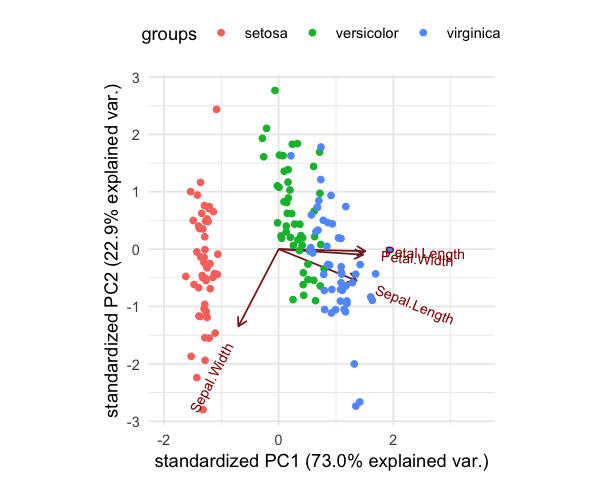

In [7]:
data(iris)
ir.pca <- prcomp(iris[,-5], center = TRUE, scale. = TRUE) 
ggbiplot(ir.pca, groups = iris$Species) + theme_minimal() + theme(legend.position="top") + xlim(-2, 3.5)

The *PCA biplot* is a standard way to visualize complex sets of data. It is basically a specialized scatterplot with samples are displayed as points while variables are displayed either as vectors. The original data frame was a 60 × 13 data set, and we plot it here making the overall conclusions inuitive.
- The PCA returns two axes (PC1 and PC2), and plots every one of the data points in this coordinate system. The axes correspond to major direction of variation in the data, as inferred by PCA. 
- Points that are closer together in this coordinate system are more similar overall, and PC1 is more important than PC2
  - you can tell that be seeing that PC1 explains more variance inthe data than PC2.
  - in this case, species are well-separated by PC1, so we can conclude that variation described by PC1 corresponds largely to species-level variation.
### Loadings
The arrows indicate *PCA loadings* of the original variable. Loadings describe the extent to which each original variable corresponds to each PCA axis.
  - The longer the arrow, and the more parallel it is with the axis, the more it contributes to differences
  - For example, Petal.Width is parallel to PC1, an axis that explains most of the variance between speceis
  - By contrast Sepal.Width is correlated with PC1 and PC2 and not as strongly with PC1
    - We can thus conclude that Petal.Width is better at differentiatiing species than Sepal.Width

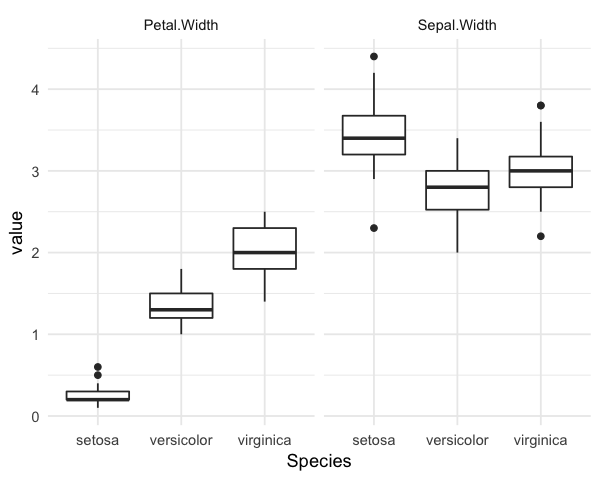

In [8]:
iris %>% select(Species, Sepal.Width, Petal.Width) %>%
    gather(key=Measure, value=value, -Species) %>%
    ggplot(aes(Species, value)) +geom_boxplot() +facet_grid(~Measure) + theme_minimal()

- We see that plotting data for these two variables validates results from the PCA. 
- PCA is an extremly versatile and useful tool for exploratory analysis of complex data sets.

## Main analysis
We will start by loading invertebrate and vegetation data.

In [9]:
inverts <- read.csv("invertebrates.csv")
head(inverts)

Group,Site,Method,Coleoptera,Hymenoptera,Lepidoptera,Hemiptera,Orthoptera,Diptera,Ticks,Spiders,Isoptera,Mites
Tom,Foredune,Beating,0,0,0,0,0,0,0,0,0,0
Tom,Foredune,Sweeping,1,1,0,0,0,0,0,1,1,1
Tom,Foredune,Light,0,0,0,0,0,0,0,0,0,0
Tom,Hinddune,Beating,0,0,0,0,1,0,0,4,0,0
Tom,Hinddune,Sweeping,0,0,0,0,0,1,0,0,0,0
Tom,Hinddune,Light,0,0,0,0,0,0,0,0,0,0


The invertebrate data are summarized by order to reduce the number of zeros. Very hard to tell anything from the raw data table, especially given the number of different orders.

In [10]:
vegcover <- read.csv("vegcover.csv")
head(vegcover)

Group,Site,TreePercent,ShrubPercent,GrassPercent,ForbPercent,stems
Oliver,Foredune,0,25,72,0.0,0
Rosie,Foredune,0,30,60,5.0,2
Ross,Foredune,0,50,10,60.0,4
Sonya,Foredune,0,23,87,1.0,0
Tom,Foredune,0,10,92,0.0,0
Oliver,Hinddune,60,25,0,6.1,15


The vegetation data are from the first prac, and provide one measure of the vegetation in the plot.



## Using principal component analysis (PCA) to examine the effect of sampling method


As we saw with the iris data, you can use PCA for an exploration of the underlying structure. We drop the first three columns, which are not numeric, and plot the PCA results

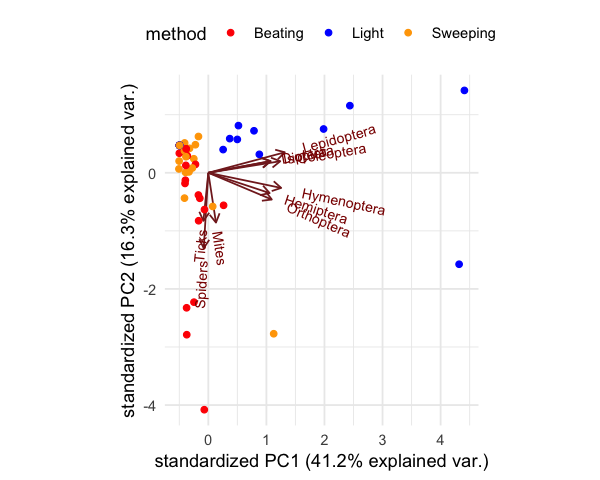

In [11]:
inverts.pca <- prcomp(inverts %>% select(-1:-3), center = TRUE, scale. = TRUE) 
ggbiplot(inverts.pca, groups = inverts$Method) + theme_minimal() + theme(legend.position="top") + 
    scale_color_manual(name="method", values = c("red", "blue", "orange")) 

As you can see the green points corresponding to light trapping are separated from the beating and sweeping points. 

## Joining invertebrate and plant data sets

We can easily join different data asts that have common identifiers by column. This allows us to join the invertebrate and plant data sets.
- Note that we can't directly compare the plant and animal data across all sites, since we have light trapping data 

In [12]:
vegInverts <- inverts %>% group_by(Group, Site) %>% filter(Method != "Light") %>%
    select(-Method) %>% # we only have methods for inverts, so we take all of them together
    summarise_all(list(sum)) %>% #sum everything
    left_join(vegcover, by = c("Group", "Site")) %>% ungroup() #join the two data sets by group and site
head(vegInverts)

Group,Site,Coleoptera,Hymenoptera,Lepidoptera,Hemiptera,Orthoptera,Diptera,Ticks,Spiders,Isoptera,Mites,TreePercent,ShrubPercent,GrassPercent,ForbPercent,stems
Oliver,Dry Forest,2,8,0,2,1,6,0,13,0,2,85,35.0,30.2,0.0,6
Oliver,Foredune,1,1,0,0,0,1,0,1,0,0,0,25.0,72.0,0.0,0
Oliver,Hinddune,0,4,0,0,0,0,0,7,1,0,60,25.0,0.0,6.1,15
Oliver,Wet Forest,1,2,0,0,0,2,0,13,0,0,90,5.5,2.0,0.0,16
Rosie,Dry Forest,2,2,0,1,0,0,0,4,0,0,70,40.0,45.0,5.0,19
Rosie,Foredune,1,0,0,1,1,0,0,1,0,0,0,30.0,60.0,5.0,2


This is pretty awesome! We can now create correlations between different data sets.

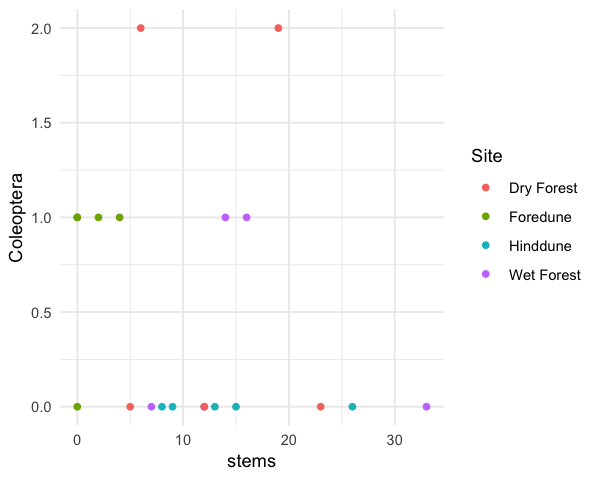

In [13]:
ggplot(vegInverts, aes(stems, Coleoptera, color  = Site )) +geom_point() + theme_minimal()

This pretty much matches what we expect, right? There are few beetles in the foredune region, and there are also few trees. In the forest, we have both trees and beetles.

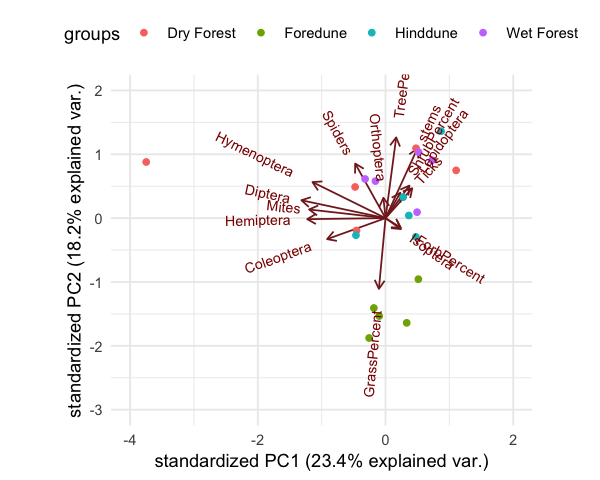

In [14]:
vegInverts.pca <- prcomp(vegInverts %>% select(-1:-2), center = TRUE, scale. = TRUE)
ggbiplot(vegInverts.pca, groups = vegInverts$Site) + theme_minimal() + theme(legend.position="top") + 
ylim(-3,2) + xlim(-4,2)

This plot reveals a lot about the relationships between plants and animal communities. For example, unsurprisingly, it looks like tree and grass cover are anticorrelated. Let's test that:


Call:
lm(formula = GrassPercent ~ TreePercent, data = vegInverts)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.039 -17.321  -3.356  18.149  38.538 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  54.0390    10.0099   5.399 3.95e-05 ***
TreePercent  -0.3965     0.1307  -3.033  0.00715 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.66 on 18 degrees of freedom
Multiple R-squared:  0.3382,	Adjusted R-squared:  0.3014 
F-statistic: 9.199 on 1 and 18 DF,  p-value: 0.007152


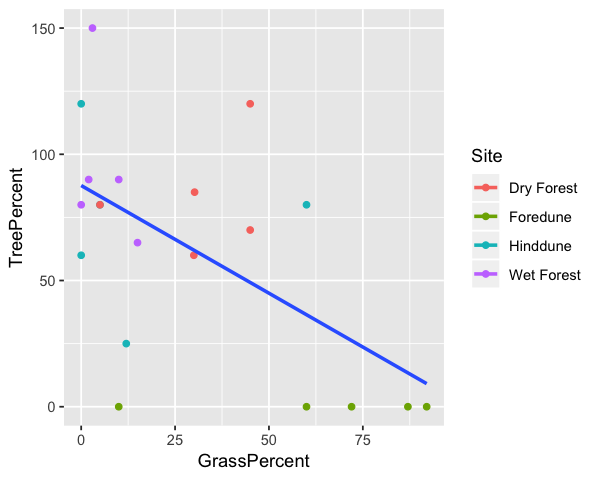

In [15]:
ggplot(vegInverts, aes(GrassPercent, TreePercent, color = Site )) + geom_point() + 
geom_smooth(method = "lm", se = F, aes(group = 1)) # group = 1 overrides grouping by color

In [20]:
summary(lm(GrassPercent ~ TreePercent, data = vegInverts))


Call:
lm(formula = GrassPercent ~ TreePercent, data = vegInverts)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.039 -17.321  -3.356  18.149  38.538 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  54.0390    10.0099   5.399 3.95e-05 ***
TreePercent  -0.3965     0.1307  -3.033  0.00715 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.66 on 18 degrees of freedom
Multiple R-squared:  0.3382,	Adjusted R-squared:  0.3014 
F-statistic: 9.199 on 1 and 18 DF,  p-value: 0.007152


# Questions 

- Each question is worth 5 points

Please submit these as a PDF via Turnitin. Because some of these questions require a bit of writing and the server might time out when you are doing this, I suggest that you finish the computations and plots in Jupyter first, and then tackle the writing questions when you no longer need access to the R kernel.

1. Provide plots of mean (with standard error bars) of richness, diversity, and evenness for the wet and dry forest invertebrate communities at Kioloa. Make sure figures are fully labelled. Provide an explanation for the observed pattern.
2. Look at loadings on the biplot color-coded by method of insect collection. Argue that there's evidence of taxonomic bias by method. Using our results and the biology of the collected taxa, explain why this bias exists.
3. Come up with a biologically-motivated hypothesis that makes predictions about relationships between either arhropod taxa or arthropods and plants. Test the prediction using a regression model. Explain whether your hypothesis was supported or not by the data based on the result of the statistical test.
4. Suggest five improvements to the experimental or statistical methodology of the field lab.